In [9]:
###************************************************************************************
# Nolan Graham
# ML – HW#4
# Filename: ml_hw4.ipynb
# Due: 3/6/2025
#
# Objective:
# To preprocess data, train machine learning models, evaluate performance, and visualize results.
###************************************************************************************


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
file_path = "Concrete_Data.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Rename columns
df.columns = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", 
              "Coarse Aggregate", "Fine Aggregate", "Age", "Strength"]

# Display first 5 rows
df.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# Generate correlation matrix
print(df.corr())

# Separate features and target variable
X = df.drop(columns=["Strength"])
y = df["Strength"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


                      Cement  Blast Furnace Slag   Fly Ash     Water  \
Cement              1.000000           -0.275193 -0.397475 -0.081544   
Blast Furnace Slag -0.275193            1.000000 -0.323569  0.107286   
Fly Ash            -0.397475           -0.323569  1.000000 -0.257044   
Water              -0.081544            0.107286 -0.257044  1.000000   
Superplasticizer    0.092771            0.043376  0.377340 -0.657464   
Coarse Aggregate   -0.109356           -0.283998 -0.009977 -0.182312   
Fine Aggregate     -0.222720           -0.281593  0.079076 -0.450635   
Age                 0.081947           -0.044246 -0.154370  0.277604   
Strength            0.497833            0.134824 -0.105753 -0.289613   

                    Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                      0.092771         -0.109356       -0.222720   
Blast Furnace Slag          0.043376         -0.283998       -0.281593   
Fly Ash                     0.377340         -0.009977   

In [5]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Train Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_scaled, y_train)
y_pred_dtr = dtr.predict(X_test_scaled)

# Train SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)


In [6]:
# Calculate MSE and R² for all models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print evaluation results
print(f"Linear Regression MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Decision Tree MSE: {mse_dtr:.2f}, R²: {r2_dtr:.2f}")
print(f"SVR MSE: {mse_svr:.2f}, R²: {r2_svr:.2f}")


Linear Regression MSE: 95.98, R²: 0.63
Decision Tree MSE: 53.67, R²: 0.79
SVR MSE: 88.98, R²: 0.65


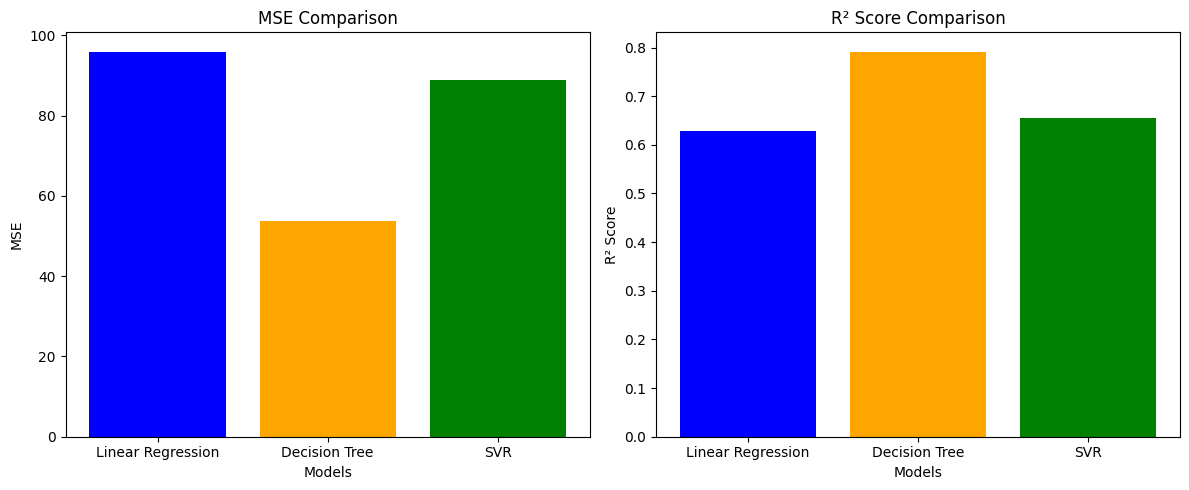

In [7]:
# MSE and R² comparison bar plots
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.bar(["Linear Regression", "Decision Tree", "SVR"], [mse_lr, mse_dtr, mse_svr], color=["blue", "orange", "green"])
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE Comparison")

plt.subplot(1, 2, 2)
plt.bar(["Linear Regression", "Decision Tree", "SVR"], [r2_lr, r2_dtr, r2_svr], color=["blue", "orange", "green"])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("R² Score Comparison")

plt.tight_layout()
plt.show()


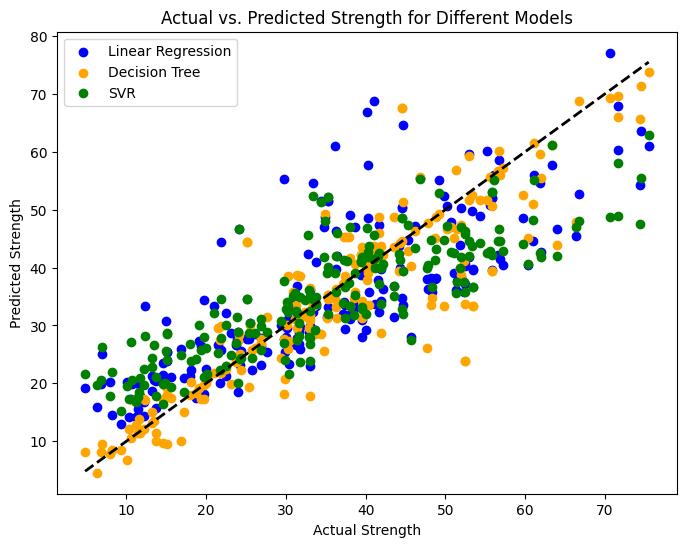

In [8]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred_lr, color="blue", label="Linear Regression")
plt.scatter(y_test, y_pred_dtr, color="orange", label="Decision Tree")
plt.scatter(y_test, y_pred_svr, color="green", label="SVR")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="black", linewidth=2)

plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs. Predicted Strength for Different Models")
plt.legend()
plt.show()
